In [2]:
import yfinance as yf
import pandas as pd
import talib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
stock = yf.Ticker("TSLA")
df = stock.history(period="max")

In [15]:
df.iloc[-730:]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_10,sma_50,sma_200
Date,,,,,,,,,,
2020-06-26 00:00:00-04:00,66.318665,66.333336,63.658001,63.982666,132823500,0.0,0.0,65.815666,56.796533,37.179413
2020-06-29 00:00:00-04:00,64.600670,67.333336,63.234669,67.290001,135396000,0.0,0.0,65.938667,57.137147,37.433907
2020-06-30 00:00:00-04:00,67.099998,72.512665,66.915337,71.987335,253777500,0.0,0.0,66.589867,57.581747,37.712110
2020-07-01 00:00:00-04:00,72.199997,75.688667,72.033333,74.641998,199903500,0.0,0.0,67.442133,58.158960,38.004383
2020-07-02 00:00:00-04:00,81.431999,81.866669,79.040001,80.577332,258751500,0.0,0.0,68.806800,58.794360,38.325673
...,...,...,...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,167.660004,169.759995,164.550003,166.350006,105592500,0.0,0.0,166.806998,178.732199,205.394434
2023-05-16 00:00:00-04:00,165.649994,169.520004,164.350006,166.520004,98288800,0.0,0.0,167.427998,178.186400,204.741284
2023-05-17 00:00:00-04:00,168.410004,174.500000,167.190002,173.860001,125473600,0.0,0.0,168.752998,177.909399,204.124200


In [11]:
df["sma_10"] = talib.SMA(df["Close"], timeperiod=10)
df["sma_50"] = talib.SMA(df["Close"], timeperiod=50)
df["sma_200"] = talib.SMA(df["Close"], timeperiod=200)

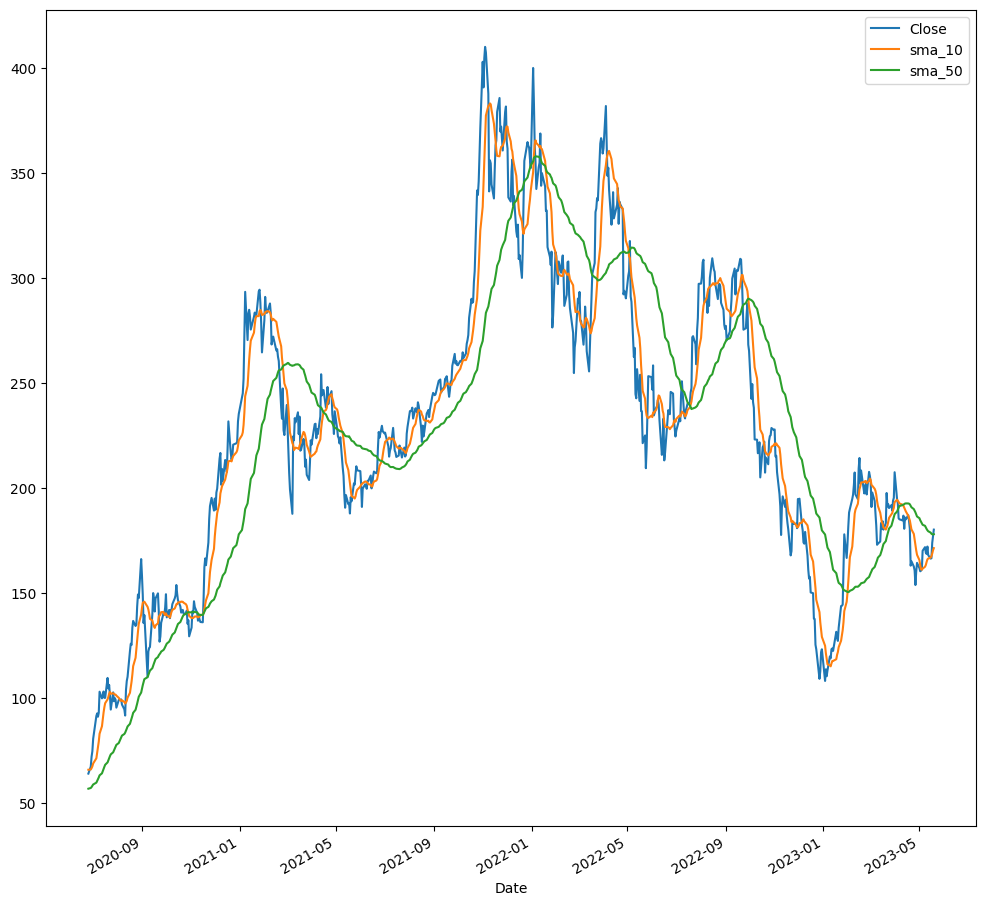

In [16]:
df.iloc[-730:][['Close','sma_10','sma_50']].plot(figsize=(12,12))
plt.show()

## EMA

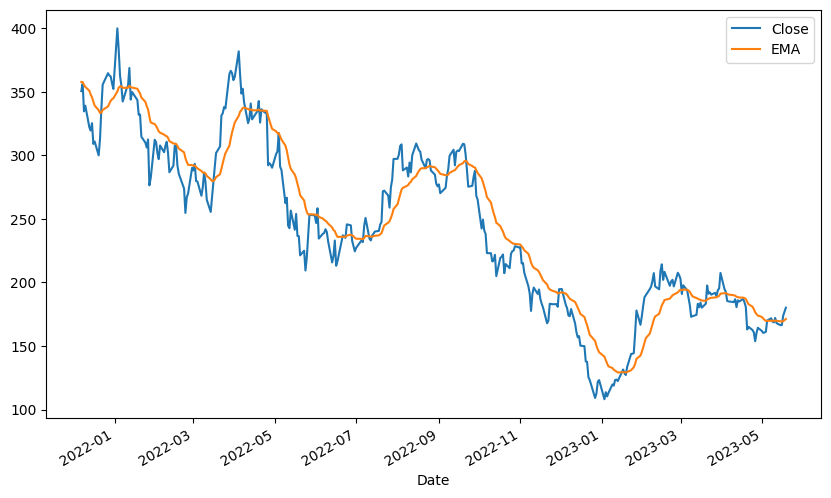

In [20]:
df['EMA'] = talib.EMA(df['Close'], timeperiod = 20)
df.iloc[-365:][['Close','EMA']].plot(figsize=(10,6))
plt.show()

## ADX: Average Directional Movement Index(Momentum Indicator)

In [ ]:
## ADX can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values.

<Axes: xlabel='Date'>

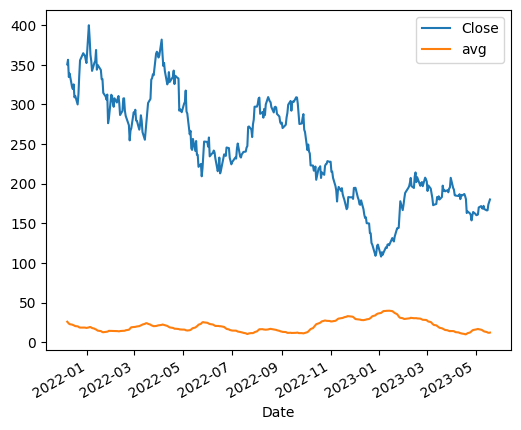

In [24]:
df['avg'] = talib.ADX(df['High'],df['Low'], df['Close'], timeperiod=20)
df.iloc[-365:][['Close','avg']].plot(figsize=(6,5))

## Bollinger Bands

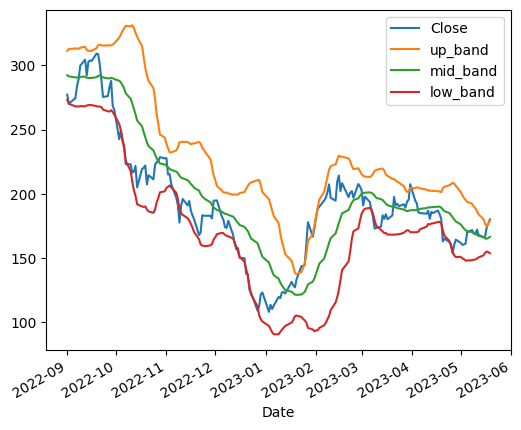

In [29]:
df['up_band'], df['mid_band'], df['low_band'] =   talib.BBANDS(df['Close'], timeperiod =20)
df.iloc[-180:][['Close','up_band','mid_band','low_band']].plot(figsize=  
                                   (6,5))
plt.show()

## Relative Strength Index(RSI)

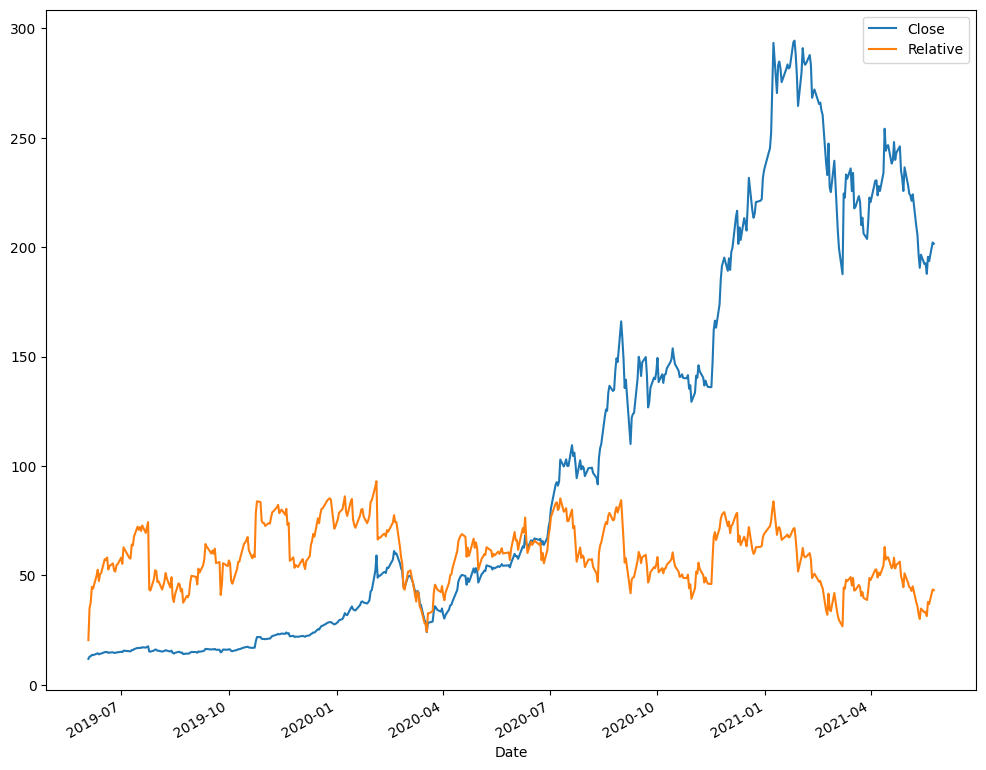

In [34]:
df['Relative'] = talib.RSI(df['Close'],14)
df.iloc[-1000:-500][['Close','Relative']].plot(figsize=(12,10))
plt.show()